## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import eli5
import lightgbm as lgb

pd.set_option('display.max_columns', None)
from collections import Counter
from wordcloud import WordCloud
%matplotlib inline
plt.style.use('ggplot')
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from lightgbm import LGBMRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
# from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


import warnings
warnings.filterwarnings('ignore')

In [9]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [10]:
print("Shape of train data : ", train.shape)
print("Shape of test data : ", test.shape)

Shape of train data :  (3000, 23)
Shape of test data :  (4398, 22)


In [11]:
train.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [12]:
# Convert string columns to dictionary
json_columns = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df, json_columns = json_columns):
    for col in json_columns:
        df[col] = df[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

train = text_to_dict(train)
test = text_to_dict(test)

In [14]:
train['belongs_to_collection'][:5]

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                   {}
3                                                   {}
4                                                   {}
Name: belongs_to_collection, dtype: object

In [15]:
train['belongs_to_collection'].apply(lambda x: len(x) if x!={} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

In [16]:
train['collection'] = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x!={} else 0)
train['has_collection'] = train['collection'].apply(lambda x: 1 if x!=0 else 0)

test['collection'] = test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x!={} else 0)
test['has_collection'] = test['collection'].apply(lambda x: 1 if x!=0 else 0)

train.drop(['belongs_to_collection'], axis=1, inplace=True)
test.drop(['belongs_to_collection'], axis=1, inplace=True)

## Working with Genres

In [18]:
train['genres'][:3]

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
Name: genres, dtype: object

In [19]:
train['genres'].apply(lambda x: len(x) if x!={} else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

most of movie have 1 to 5 genre but there is also exist some movie that have more then 5 genre so may be thay can be outlier.

In [20]:
train['num_genres'] = train['genres'].apply(lambda x: len(x) if x!={} else 0)
list_of_genres = list(train['genres'].apply(lambda x: [j['name'] for j in x] if x!={} else []).values)
train['all_genres'] = train['genres'].apply(lambda x: ' '.join([j['name'] for j in x]) if x!={} else "" )

top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    train['genres_'+g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)


test['num_genres'] = test['genres'].apply(lambda x: len(x) if x!={} else 0)
test['all_genres'] = test['genres'].apply(lambda x: ' '.join([j['name'] for j in x]) if x!={} else "" )

for g in top_genres:
    test['genres_'+g] = test['all_genres'].apply(lambda x: 1 if g in x else 0)


Here we made special category for most common 15 genre and assign 1 if movie belongs to that genre else 0

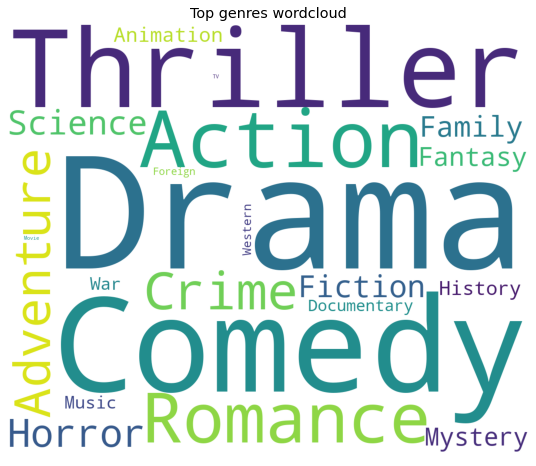

In [21]:
plt.figure(figsize=(12, 8))
text = ' '.join(i for j in list_of_genres for i in j)
img = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.title('Top genres wordcloud')
plt.axis("off")
plt.imshow(img)
plt.show()

Based on wordcloud we can say that most of the movie belongs to Drama, comedy and thriller genre.

**production_companies**

In [22]:
train['production_companies'].apply(lambda x: len(x) if x!={} else 0).value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

In [23]:
train['production_companies'].head(5)

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                   {}
4                                                   {}
Name: production_companies, dtype: object

In [24]:
train['num_production_companies'] = train['production_companies'].apply(lambda x: len(x) if x!={} else 0)
list_of_pc = train['production_companies'].apply(lambda x: [i['name'] for i in x] if x!={} else []).values
train['all_production_companies'] = train['production_companies'].apply(lambda x : ' '.join( i['name'] for i in x ) if x!={} else "" )

top_pc = [m[0] for m in Counter(i for j in list_of_pc for i in j).most_common(15)]
for g in top_pc:
    train['production_companies_' + g] = train['all_production_companies'].apply(lambda x:1 if g in x else 0)



test['num_production_companies'] = test['production_companies'].apply(lambda x: len(x) if x!={} else 0)
test['all_production_companies'] = test['production_companies'].apply(lambda x : ' '.join( i['name'] for i in x ) if x!={} else "" )

for g in top_pc:
    test['production_companies_' + g] = test['all_production_companies'].apply(lambda x:1 if g in x else 0)

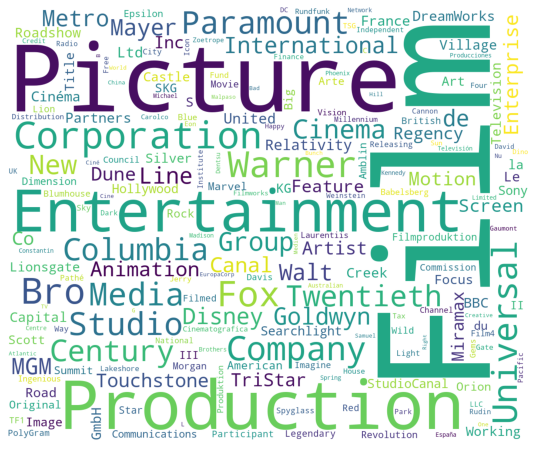

In [25]:
plt.figure(figsize=(12, 8))
text = ' '.join(i for j in list_of_pc for i in j)
img = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.axis('off')
plt.imshow(img)
plt.show()

**Production Countries**

In [26]:
train['production_countries'][:2]

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, dtype: object

In [27]:
train['production_countries'].apply(lambda x: len(x) if x!={} else 0).value_counts()

1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: production_countries, dtype: int64

In data there exist some movie that does not belongs to any country so we can say those are outliers.

In [28]:
train['num_production_countries'] = train['production_countries'].apply(lambda x: len(x) if x!={} else 0)
list_of_prod_countries = train['production_countries'].apply(lambda x: [i['name'] for i in x]  if x!={} else []).values
train['all_production_countries'] = train['production_countries'].apply(lambda x: ' '.join(i['name'] for i in x) if x!={} else "")
top_production_countries = [m[0] for m in Counter([i for j in list_of_prod_countries for i in j]).most_common(15)]

for g in top_production_countries:
    train['production_countries_' + g] = train['all_production_countries'].apply(lambda x: 1 if g in x else 0)
    

test['num_production_countries'] = test['production_countries'].apply(lambda x: len(x) if x!={} else 0)
test['all_production_countries'] = test['production_countries'].apply(lambda x: ' '.join(i['name'] for i in x) if x!={} else "")

for g in top_production_countries:
    test['production_countries_' + g] = test['all_production_countries'].apply(lambda x: 1 if g in x else 0)

In [29]:
for i, j in Counter([i for j in list_of_prod_countries for i in j]).most_common(10):
    print(i,(30-len(i))*" ", j/len(list_of_prod_countries)*100)

United States of America        76.06666666666668
United Kingdom                  12.666666666666668
France                          7.3999999999999995
Germany                         5.566666666666667
Canada                          4.0
India                           2.7
Italy                           2.1333333333333333
Japan                           2.033333333333333
Australia                       2.033333333333333
Russia                          1.9333333333333333


US involved as production country in more than 76% movie